In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from CIPEC import *

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

[Qibo 0.2.14|INFO|2025-02-26 16:47:16]: Using numpy backend on /CPU:0


# 1) Sanity check: LP and linear solver must agree if the basis is minimal

In [65]:
nqubits = 1

# comparing the negativity of different bases
params_basic = {'I':0., 'H': 1e-3, 'S': 1e-3, 'T': 1e-2, 'CX': 1e-2, 'Px':1e-3, 'Py':1e-3, 'Pz':1e-3}
print(f'\nUsing local depolarizing error channels with parameters\n{params_basic}\n')

B_T = noiseless_basis(nqubits,include_T=True)
params_T = {k:np.sum([params_basic[gate] for gate in k]) for k in B_T.keys()}
noise_model_T = {k:gates.DepolarizingChannel(tuple(range(nqubits)),params_T[k]) for k in B_T.keys()}
B_T_noisy = apply_noise_to_basis(B_T,noise_model_T)

B_Cliff = noiseless_basis(nqubits,include_T=False)
params_Cliff = {k:np.sum([params_basic[gate] for gate in k]) for k in B_Cliff.keys()}
noise_model_Cliff = {k:gates.DepolarizingChannel(tuple(range(nqubits)),params_Cliff[k]) for k in B_Cliff.keys()}
B_Cliff_noisy = apply_noise_to_basis(B_Cliff,noise_model_Cliff)

print()

legends = ['Clifford+T (noiseless)','Clifford+T (noisy)','Clifford (noiseless)','Clifford (noisy)']
bases = [B_T,B_T_noisy,B_Cliff,B_Cliff_noisy]

# target U
U = gates.UnitaryChannel(tuple(range(nqubits)),[(1.,qi.random_unitary(2**nqubits,'haar'))]).to_choi()
fancy_display(U, 'U')

for name,B in zip(legends,bases):
    
    print(f'------------------------------------- {name} basis: -------------------------------------\n')
    
    # c by linear system solving
    print('Solution via linear system:')
    c_LS = decomposition_coefficients(U, B)
    neg_LS = np.linalg.norm(c_LS,1)
    # fancy_display(c_LS.reshape(1,-1), 'c_1')
    fancy_display(neg_LS, '\|c^{(LS)}\|_1')

    # c by LP solve
    print('Solution via LP:',end='')
    p_LP, c_LP = solve_LP(U, B)
    neg_LP = np.linalg.norm(c_LP,1)
    # fancy_display(c_LP.reshape(1,-1), 'c_1')
    fancy_display(neg_LP, '\|c^{(LP)}\|_1')
    
    fancy_display(np.linalg.norm(c_LS-c_LP, 2), '\|c^{(LS)}_1-c^{(LP)}_1\|_2')


Using local depolarizing error channels with parameters
{'I': 0.0, 'H': 0.001, 'S': 0.001, 'T': 0.01, 'CX': 0.01, 'Px': 0.001, 'Py': 0.001, 'Pz': 0.001}

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)
Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)



<IPython.core.display.Latex object>

------------------------------------- Clifford+T (noiseless) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Clifford+T (noisy) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Clifford (noiseless) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Clifford (noisy) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [64]:
nqubits = 2

# comparing the negativity of different bases
params_basic = {'I':0., 'H': 1e-3, 'S': 1e-3, 'T': 1e-2, 'CX': 1e-2, 'Px':1e-3, 'Py':1e-3, 'Pz':1e-3}
print(f'\nUsing local depolarizing error channels with parameters\n{params_basic}\n')
params_basic = params_basic_2q(params_basic)

B_T = noiseless_basis(nqubits,include_T=True)
params_T = {k:np.sum([params_basic[gate] for gate in k]) for k in B_T.keys()}
noise_model_T = {k:gates.DepolarizingChannel(tuple(range(nqubits)),params_T[k]) for k in B_T.keys()}
B_T_noisy = apply_noise_to_basis(B_T,noise_model_T)

B_Cliff = noiseless_basis(nqubits,include_T=False)
params_Cliff = {k:np.sum([params_basic[gate] for gate in k]) for k in B_Cliff.keys()}
noise_model_Cliff = {k:gates.DepolarizingChannel(tuple(range(nqubits)),params_Cliff[k]) for k in B_Cliff.keys()}
B_Cliff_noisy = apply_noise_to_basis(B_Cliff,noise_model_Cliff)

print()

legends = ['Clifford+T (noiseless)','Clifford+T (noisy)','Clifford (noiseless)','Clifford (noisy)']
bases = [B_T,B_T_noisy,B_Cliff,B_Cliff_noisy]

# target U
U = gates.UnitaryChannel(tuple(range(nqubits)),[(1.,qi.random_unitary(2**nqubits,'haar'))]).to_choi()
# fancy_display(U, 'U')

for name,B in zip(legends,bases):
    
    print(f'------------------------------------- {name} basis: -------------------------------------\n')
    
    # c by linear system solving
    print('Solution via linear system:')
    c_LS = decomposition_coefficients(U, B)
    neg_LS = np.linalg.norm(c_LS,1)
    #fancy_display(c_LS.reshape(1,-1), 'c_1')
    fancy_display(neg_LS, '\|c^{(LS)}\|_1')

    # c by LP solve
    print('Solution via LP:',end='')
    p_LP, c_LP = solve_LP(U, B)
    neg_LP = np.linalg.norm(c_LP,1)
    #fancy_display(c_LP.reshape(1,-1), 'c_1')
    fancy_display(neg_LP, '\|c^{(LP)}\|_1')
    
    fancy_display(np.linalg.norm(c_LS-c_LP, 2), '\|c^{(LS)}_1-c^{(LP)}_1\|_2')


Using local depolarizing error channels with parameters
{'I': 0.0, 'H': 0.001, 'S': 0.001, 'T': 0.01, 'CX': 0.01, 'Px': 0.001, 'Py': 0.001, 'Pz': 0.001}

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)
Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)

------------------------------------- Clifford+T (noiseless) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

C:\Users\Giancarlo.Camilo\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Clifford+T (noisy) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Clifford (noiseless) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Clifford (noisy) basis: -------------------------------------

Solution via linear system:


<IPython.core.display.Latex object>

Solution via LP:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# 2) 1-qubit overcomplete basis
## 2.1) Negativity comparison: full Clifford group vs. minimal Clifford basis 


Using local depolarizing error channels with parameters
{'I': 0.0, 'H': 0.001, 'S': 0.001, 'T': 0.01, 'CX': 0.01, 'Px': 0.001, 'Py': 0.001, 'Pz': 0.001}

Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)
Applied noise model to basis elements
No longer a basis! :(
Only spanned 13 directions

------------------------------------- Minimal Clifford (noiseless) basis: -------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Minimal Clifford (noisy) basis: -------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Full Clifford group (noiseless) basis: -------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------------------------------- Full Clifford group (noisy) basis: -------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

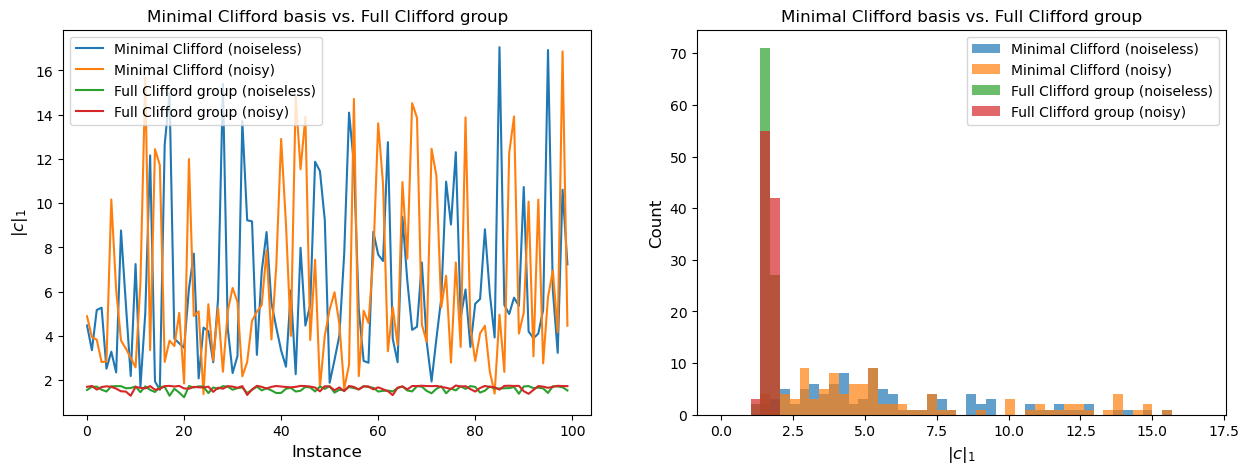

In [68]:
nqubits = 1
nsamples = 100

# comparing the negativity of different bases
params_basic = {'I':0., 'H': 1e-3, 'S': 1e-3, 'T': 1e-2, 'CX': 1e-2, 'Px':1e-3, 'Py':1e-3, 'Pz':1e-3}
print(f'\nUsing local depolarizing error channels with parameters\n{params_basic}\n')
params_basic['E'] = params_basic['H'] + 3*params_basic['S']
params_basic['X'] = 2*params_basic['H'] + 2*params_basic['S']

# minimal Clifford basis
B_Cliff = noiseless_basis(nqubits,include_T=False)
params_Cliff = {k:np.sum([params_basic[gate] for gate in k]) for k in B_Cliff.keys()}
noise_model_Cliff = {k:gates.DepolarizingChannel(tuple(range(nqubits)),params_Cliff[k]) for k in B_Cliff.keys()}
B_Cliff_noisy = apply_noise_to_basis(B_Cliff,noise_model_Cliff)

# full Clifford group basis
B_full_Cliff = clifford_group(nqubits, ignore_global_phase=True, letters='SEX')
for k in B_full_Cliff.keys():
    B_full_Cliff[k] = qi.to_choi(B_full_Cliff[k])
nonunitary_channels = state_prep_channels(nqubits)
for k in nonunitary_channels.keys():
    B_full_Cliff[k] = nonunitary_channels[k]
params_full_Cliff = {}
for k in B_full_Cliff.keys():
    params_full_Cliff[k] = np.sum([params_basic[gate] for gate in k]) if k[0]!='P' else params_basic[k]
noise_model_full_Cliff = {k:gates.DepolarizingChannel(tuple(range(nqubits)),params_full_Cliff[k]) for k in B_full_Cliff.keys()}
B_full_Cliff_noisy = apply_noise_to_basis(B_full_Cliff,noise_model_full_Cliff)

print()

# run multiple times and plot 
fig, ax = plt.subplots(1,2,figsize=(15,5))

legends = ['Minimal Clifford (noiseless)','Minimal Clifford (noisy)','Full Clifford group (noiseless)','Full Clifford group (noisy)']
bases = [B_Cliff, B_Cliff_noisy, B_full_Cliff,B_full_Cliff_noisy]

neg_max = 0 # for the histogram bins

for name,B in zip(legends,bases):

    negativities = []
    
    print(f'------------------------------------- {name} basis: -------------------------------------')    
    
    for _ in range(nsamples):
        
        # target U
        U = gates.UnitaryChannel(tuple(range(nqubits)),[(1.,qi.random_unitary(2**nqubits,'haar'))]).to_choi()

        # c by LP solve
        p_LP, c_LP = solve_LP(U, B)
        neg_LP = np.linalg.norm(c_LP,1)
        negativities.append(neg_LP)
    neg_max = max(neg_max, np.max(negativities))
    ax[0].plot(negativities)
    ax[1].hist(negativities,bins=np.arange(0,neg_max,neg_max/50),alpha=0.7)        
    fancy_display(np.mean(negativities), 'mean(\|c\|_1)')
    fancy_display(np.sqrt(np.var(negativities)), 'var(\|c\|_1)')

ax[0].set_title(f'Minimal Clifford basis vs. Full Clifford group')
ax[0].set_xlabel('Instance',fontsize='large')
ax[0].set_ylabel(r'$\|c\|_1$',fontsize='large')
#ax[0].set_yscale('log')
ax[0].legend(legends)
ax[1].set_title(f'Minimal Clifford basis vs. Full Clifford group')
ax[1].set_xlabel(r'$\|c\|_1$',fontsize='large')
ax[1].set_ylabel('Count',fontsize='large')
#ax[1].set_yscale('log')
ax[1].legend(legends);